## Tensor calculation
矢量计算

In [1]:
import torch
import time

# init variable a, b as 1000 dimension vectors
n = 1000
a = torch.ones(n)
b = torch.ones(n)

In [4]:
# define a timer class to record time
class Timer(object):
    """Record multiple running time"""
    def __init__(self):
        self.times = []
        self.start()
    
    def start(self):
        # start the timer
        self.start_time = time.time()
        
    def stop(self):
        # stop the timer and record time
        self.times.append(time.time() - self.start_time)
        return self.times[-1]
    
    def avg(self):
        # calculate the average and return
        return sum(self.times) / len(self.times)
    
    def sum(self):
        return sum(self.times)

now let's start to do test. 
First, let the two tenor to add each item by scalar using for loop

In [8]:
timer = Timer()
c = torch.zeros(n)
for i in range(n):
    c[i] = a[i] + b[i]
'%.5f sec' % timer.stop()

'0.06702 sec'

another is using torch to let two tenor add vertor directly

In [9]:
timer.start()
d = a + b
'%.5f sec' % timer.stop()

'0.00151 sec'

we can know that the last one is more quickly. Therefor, we should use vector to calculate as much as possible

## Linear Regression 
    start from ZERO

In [15]:
# import packages and modules
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

print(torch.__version__)

1.3.1


### 生成数据集
使用线性模型来生成数据集，生成一个1000个样本的数据集，下面是用来生成数据的线性关系：

$$
\mathrm{price} = w_{\mathrm{area}} \cdot \mathrm{area} + w_{\mathrm{age}} \cdot \mathrm{age} + b
$$


In [22]:
# set input feature number
num_inputs = 2
# set example number 
num_examples = 1000

# set true weight and bias in order to generate corresponded label
true_w = [2, -3.4]
true_b = 4.2

In [20]:
# generate weight features (area and age) example trainnning data
features = torch.randn(num_examples, num_inputs, dtype=torch.float32)
features

tensor([[-0.4190,  1.3476],
        [ 0.2272,  0.2649],
        [-0.2700, -0.7833],
        ...,
        [ 2.7340, -0.8550],
        [-0.5510, -0.8247],
        [-0.6252, -2.2972]])

In [28]:
# generate price lables 
labels = true_w[0] * features[:,0] + true_w[1] * features[:, 1] + true_b
labels.size()

torch.Size([1000])

In [30]:
labels

tensor([-1.1860e+00,  3.7551e+00,  6.3291e+00,  1.3070e+01,  3.7503e+00,
         1.1614e+00, -6.3887e-01,  5.3815e+00,  6.2475e+00,  4.2241e-02,
         1.7388e+00, -7.6657e+00, -7.7281e-02,  1.0972e+00,  6.4344e+00,
         2.1426e+00, -1.0285e+00,  1.3004e+01,  2.8983e+00, -5.6323e-01,
         6.4837e+00,  5.3458e+00,  3.1638e+00,  2.0017e+00,  3.6721e+00,
         7.3682e-01,  9.5935e-01,  1.8134e+00,  4.2892e+00,  4.4281e+00,
         7.0436e+00,  2.5577e+00,  8.6927e+00,  7.0178e+00,  6.2105e+00,
         6.8819e+00,  6.6391e+00,  4.2593e+00,  8.4332e+00,  5.8608e+00,
         4.8377e+00,  1.3365e+01,  4.4845e+00,  3.0412e-01,  9.7754e-02,
         4.2222e+00,  5.6952e+00, -3.4607e+00,  6.9349e+00, -8.1827e-01,
         9.1248e+00,  7.6759e+00,  9.8656e-01,  7.3473e+00,  1.4343e+00,
         3.5446e+00,  6.9496e+00,  1.0307e+01,  3.3703e-01,  4.1482e+00,
         2.2992e+00,  1.0384e+01,  2.8201e+00,  3.9433e-01,  1.0473e+01,
        -1.9613e+00,  1.1596e+01,  2.0617e+00,  3.1

### 由于现实世界不可能严格按照上述线性表达式，此处再次添加一个偏差。偏差按照正态分布生成

In [31]:
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float32)
labels

tensor([-1.1830e+00,  3.7484e+00,  6.3168e+00,  1.3059e+01,  3.7472e+00,
         1.1632e+00, -6.4693e-01,  5.3963e+00,  6.2485e+00,  3.4000e-02,
         1.7390e+00, -7.6774e+00, -7.3228e-02,  1.0910e+00,  6.4283e+00,
         2.1280e+00, -1.0401e+00,  1.2995e+01,  2.8860e+00, -5.5995e-01,
         6.4720e+00,  5.3358e+00,  3.1656e+00,  2.0116e+00,  3.6764e+00,
         7.4733e-01,  9.5369e-01,  1.8072e+00,  4.2907e+00,  4.4388e+00,
         7.0403e+00,  2.5389e+00,  8.6943e+00,  7.0086e+00,  6.2277e+00,
         6.8709e+00,  6.6492e+00,  4.2659e+00,  8.4294e+00,  5.8640e+00,
         4.8311e+00,  1.3364e+01,  4.4864e+00,  2.9818e-01,  9.3361e-02,
         4.2314e+00,  5.6782e+00, -3.4654e+00,  6.9277e+00, -8.2305e-01,
         9.1227e+00,  7.6829e+00,  9.8955e-01,  7.3509e+00,  1.4299e+00,
         3.5531e+00,  6.9472e+00,  1.0321e+01,  3.2879e-01,  4.1503e+00,
         2.3059e+00,  1.0382e+01,  2.8345e+00,  3.8802e-01,  1.0468e+01,
        -1.9764e+00,  1.1603e+01,  2.0533e+00,  3.1

## 使用图像来展示生成的数据

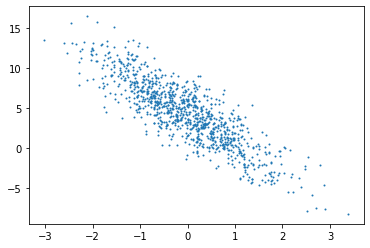

In [32]:
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)

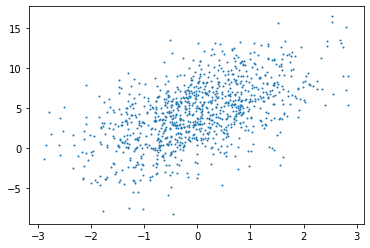

In [33]:
plt.scatter(features[:, 0].numpy(), labels.numpy(), 1)

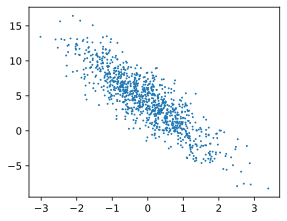

In [36]:
# another way to show graph
def use_svg_display():
    # display in vector graph
    display.set_matplotlib_formats('svg')
    
def set_figsize(figsize=(4.5, 3.5)):
    use_svg_display()
    # set the size of figure
    plt.rcParams['figure.figsize'] = figsize
    
set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);

## 读取数据集

In [44]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    # random read batch_size samples
    for i in range(0, num_examples, batch_size):
        # the last time may be not enough for a whole batch
        j = torch.LongTensor(indices[i: min(i+batch_size, num_examples)])
        yield features.index_select(0, j), labels.index_select(0, j)

In [46]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.1343, -1.4148],
        [ 0.9197, -0.0335],
        [ 0.2664,  1.9718],
        [ 2.2528,  0.1120],
        [-0.4020, -0.8504],
        [ 1.1900,  0.1050],
        [ 0.4471, -1.4222],
        [ 0.1779,  0.2525],
        [-0.2150, -0.8529],
        [-0.4858,  0.5020]]) 
 tensor([ 9.2598,  6.1556, -1.9764,  8.3449,  6.2689,  6.2319,  9.9306,  3.6938,
         6.6732,  1.5272])


## 初始化模型参数

In [91]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
w

tensor([[ 0.0046],
        [-0.0063]])

In [92]:
b = torch.zeros(1, dtype=torch.float32)
b

tensor([0.])

In [93]:
# 求导
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

## 定义模型
定义用来训练参数的训练模型：

$$
\mathrm{price} = w_{\mathrm{area}} \cdot \mathrm{area} + w_{\mathrm{age}} \cdot \mathrm{age} + b
$$

In [88]:
def linreg(X, w, b):
    return torch.mm(X,w) + b

## 定义损失函数
我们使用的是均方误差损失函数：
$$
l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2,
$$


In [86]:
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2
    #return (y_hat.view(-1) - y) ** 2 / 2
    #return (y_hat - y.view(-1)) ** 2 / 2
    #return (y_hat - y.view(y_hat.shape)) ** 2 / 2
    #return (y_hat - y.view(-1, 1)) ** 2 / 2

In [62]:
# view 函数用法
# https://www.jb51.net/article/177569.htm
import numpy as np
import torch
from torch.autograd import Variable
  
x = torch.Tensor(2,2,2)
print(x)
  
y = x.view(1,8)
print(y)
  
z = x.view(-1,4) # the size -1 is inferred from other dimensions
print(z)
  
t = x.view(8)
print(t)

tt = x.view(-1,1)
print(tt)

tt = x.view(-1)
print("\n", tt)

tensor([[[5.2428e-08, 6.3013e-10],
         [1.6597e-07, 1.6804e-04]],

        [[4.0788e-11, 7.1450e+31],
         [6.8017e+22, 1.7108e-04]]])
tensor([[5.2428e-08, 6.3013e-10, 1.6597e-07, 1.6804e-04, 4.0788e-11, 7.1450e+31,
         6.8017e+22, 1.7108e-04]])
tensor([[5.2428e-08, 6.3013e-10, 1.6597e-07, 1.6804e-04],
        [4.0788e-11, 7.1450e+31, 6.8017e+22, 1.7108e-04]])
tensor([5.2428e-08, 6.3013e-10, 1.6597e-07, 1.6804e-04, 4.0788e-11, 7.1450e+31,
        6.8017e+22, 1.7108e-04])
tensor([[5.2428e-08],
        [6.3013e-10],
        [1.6597e-07],
        [1.6804e-04],
        [4.0788e-11],
        [7.1450e+31],
        [6.8017e+22],
        [1.7108e-04]])

 tensor([5.2428e-08, 6.3013e-10, 1.6597e-07, 1.6804e-04, 4.0788e-11, 7.1450e+31,
        6.8017e+22, 1.7108e-04])


tensor([[[1.3712e-14, 6.4069e+02],
   [4.3066e+21, 1.1824e+22]],
 
  [[4.3066e+21, 6.3828e+28],
   [3.8016e-39, 0.0000e+00]]])
 
#### x.view(1,8)生成的是[1,8]的张量
tensor([[1.3712e-14, 6.4069e+02, 4.3066e+21, 1.1824e+22, 4.3066e+21, 6.3828e+28,
   3.8016e-39, 0.0000e+00]])
 
#### x.view(-1,4)其中-1是在4下的另一个维度的大小，也就是8/4=2，所以生成的是[2,4]的张量
tensor([[1.3712e-14, 6.4069e+02, 4.3066e+21, 1.1824e+22],
  [4.3066e+21, 6.3828e+28, 3.8016e-39, 0.0000e+00]])
 
#### x.view(8)生成的是[8,]的张量，是个数组
tensor([1.3712e-14, 6.4069e+02, 4.3066e+21, 1.1824e+22, 4.3066e+21, 6.3828e+28,
  3.8016e-39, 0.0000e+00])

## 定义优化函数
在这里优化函数使用的是小批量随机梯度下降：

$$
(\mathbf{w},b) \leftarrow (\mathbf{w},b) - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{(\mathbf{w},b)} l^{(i)}(\mathbf{w},b)
$$
  

In [89]:
def sgd(params, lr, batch_size):
    for param in params:
        # use .data to operate param without gradient track
        param.data -= lr * param.grad / batch_size

## 训练
当数据集，模型，损失函数和优化函数定义完了之后就可以来准备进行模型的训练了

In [96]:
# super parameter init
lr = 0.03
num_epochs = 5

net = linreg
loss = squared_loss

# training
for epoch in range(num_epochs):
    # in each epoch, all the samples in dataset will be used once
    
    # X is the feature and y is the label of a batch sample
    for X, y in data_iter(batch_size, features, labels):
        y_hat=net(X, w, b)
        print("y_hat ", y_hat)
        print("y_hat shape ", y_hat.shape)
        print("y.view(-1) ", y.view(-1))
        l = loss(net(X, w, b), y).sum()
        # calculate the gradient of batch sample loss
        l.backward()
        #using small batch random gradient descent to iter model parameters
        sgd([w, b], lr, batch_size)
        # reset parameter gradient
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f ' % (epoch + 1, train_l.mean().item()))

y_hat  tensor([[ 2.9118],
        [-4.0109],
        [ 4.9231],
        [ 6.1095],
        [ 4.0501],
        [ 7.0363],
        [ 7.5258],
        [11.7268],
        [ 5.0637],
        [ 5.6188]], grad_fn=<AddBackward0>)
y_hat shape  torch.Size([10, 1])
y.view(-1)  tensor([ 2.8999, -3.9812,  4.9317,  6.0954,  4.0532,  7.0498,  7.5225, 11.7422,
         5.0474,  5.6027])
y_hat  tensor([[ 3.9535],
        [-1.7113],
        [ 8.1222],
        [ 1.1122],
        [ 3.4958],
        [ 4.1143],
        [ 3.7609],
        [ 6.4318],
        [ 6.3685],
        [ 9.7782]], grad_fn=<AddBackward0>)
y_hat shape  torch.Size([10, 1])
y.view(-1)  tensor([ 3.9341, -1.7143,  8.1054,  1.1018,  3.4922,  4.1286,  3.7596,  6.4283,
         6.3608,  9.7571])
y_hat  tensor([[-2.0877],
        [ 5.0073],
        [-1.0373],
        [ 3.5412],
        [ 6.2452],
        [ 8.2331],
        [11.5983],
        [ 2.6620],
        [ 0.1112],
        [ 2.8586]], grad_fn=<AddBackward0>)
y_hat shape  torch.Size([10, 1

y_hat  tensor([[ 6.7439],
        [-3.8903],
        [ 4.6207],
        [ 5.9813],
        [ 1.8861],
        [ 8.4292],
        [ 3.7091],
        [ 5.2489],
        [ 3.9388],
        [10.2911]], grad_fn=<AddBackward0>)
y_hat shape  torch.Size([10, 1])
y.view(-1)  tensor([ 6.7777, -3.9090,  4.6120,  5.9821,  1.8824,  8.4294,  3.7096,  5.2624,
         3.9529, 10.2891])
y_hat  tensor([[-1.4294],
        [ 4.5067],
        [ 4.3705],
        [13.1213],
        [ 1.2786],
        [ 3.8905],
        [ 6.6538],
        [ 5.7086],
        [ 1.2756],
        [10.8425]], grad_fn=<AddBackward0>)
y_hat shape  torch.Size([10, 1])
y.view(-1)  tensor([-1.4252,  4.5027,  4.3682, 13.1106,  1.2755,  3.8995,  6.6458,  5.7207,
         1.2562, 10.8431])
y_hat  tensor([[ 5.3810],
        [ 5.8693],
        [-2.1315],
        [ 0.2159],
        [11.3130],
        [ 0.7500],
        [ 0.5516],
        [ 9.1276],
        [ 1.2863],
        [-2.4982]], grad_fn=<AddBackward0>)
y_hat shape  torch.Size([10, 1

y_hat shape  torch.Size([10, 1])
y.view(-1)  tensor([ 4.2078,  5.9374,  9.7285,  2.5348,  8.1906,  6.2025, -3.6103,  2.6250,
        -0.3925,  8.2674])
y_hat  tensor([[ 2.2633],
        [ 6.4903],
        [12.2524],
        [-0.9439],
        [ 7.7745],
        [ 0.5775],
        [ 1.6903],
        [ 2.3304],
        [-0.4943],
        [ 5.1305]], grad_fn=<AddBackward0>)
y_hat shape  torch.Size([10, 1])
y.view(-1)  tensor([ 2.2528,  6.4720, 12.2397, -0.9392,  7.7899,  0.5799,  1.6895,  2.3109,
        -0.4819,  5.1422])
y_hat  tensor([[1.0799],
        [2.5763],
        [8.9662],
        [7.9545],
        [0.3185],
        [0.8296],
        [3.0585],
        [3.5433],
        [5.6473],
        [2.4801]], grad_fn=<AddBackward0>)
y_hat shape  torch.Size([10, 1])
y.view(-1)  tensor([1.0809, 2.5705, 8.9645, 7.9616, 0.3316, 0.8095, 3.0219, 3.5383, 5.6586,
        2.4957])
y_hat  tensor([[ 5.8901],
        [ 3.3480],
        [ 6.5200],
        [ 6.8261],
        [ 7.0972],
        [ 1.8592],

y_hat  tensor([[10.1809],
        [ 8.0448],
        [ 1.1836],
        [13.0537],
        [ 5.8522],
        [ 0.4329],
        [ 3.2879],
        [ 7.2381],
        [ 8.9431],
        [ 3.6271]], grad_fn=<AddBackward0>)
y_hat shape  torch.Size([10, 1])
y.view(-1)  tensor([10.1910,  8.0456,  1.2144, 13.0592,  5.8637,  0.4244,  3.2884,  7.2488,
         8.9349,  3.6164])
y_hat  tensor([[ 0.1715],
        [ 6.1537],
        [ 3.8842],
        [ 7.5574],
        [ 6.6399],
        [ 3.6029],
        [ 8.7638],
        [ 1.9235],
        [ 8.9352],
        [-3.4455]], grad_fn=<AddBackward0>)
y_hat shape  torch.Size([10, 1])
y.view(-1)  tensor([ 0.1447,  6.1556,  3.8962,  7.5614,  6.6492,  3.6243,  8.7699,  1.9146,
         8.9130, -3.4518])
y_hat  tensor([[0.4455],
        [3.8014],
        [4.5308],
        [2.8450],
        [3.1299],
        [4.1496],
        [7.3475],
        [6.5822],
        [3.2544],
        [2.6587]], grad_fn=<AddBackward0>)
y_hat shape  torch.Size([10, 1])
y.view(

y_hat  tensor([[ 5.1072],
        [ 8.7558],
        [ 6.0894],
        [ 1.8586],
        [ 8.3253],
        [11.1763],
        [-0.7871],
        [ 0.7342],
        [ 6.9818],
        [ 3.6898]], grad_fn=<AddBackward0>)
y_hat shape  torch.Size([10, 1])
y.view(-1)  tensor([ 5.1071,  8.7521,  6.0928,  1.8431,  8.3449, 11.1712, -0.8231,  0.7473,
         6.9777,  3.6952])
y_hat  tensor([[13.3015],
        [ 7.0566],
        [ 1.1118],
        [ 5.5774],
        [ 6.3683],
        [ 0.6936],
        [ 9.8201],
        [ 4.3441],
        [ 5.6553],
        [ 0.3606]], grad_fn=<AddBackward0>)
y_hat shape  torch.Size([10, 1])
y.view(-1)  tensor([13.2890,  7.0403,  1.1018,  5.5641,  6.3608,  0.6947,  9.8067,  4.3534,
         5.6319,  0.3587])
y_hat  tensor([[ 6.5982],
        [ 1.8863],
        [ 5.8470],
        [-4.2213],
        [ 8.9690],
        [ 0.5109],
        [ 7.0322],
        [-3.8351],
        [-0.7320],
        [ 0.4563]], grad_fn=<AddBackward0>)
y_hat shape  torch.Size([10, 1

y_hat shape  torch.Size([10, 1])
y.view(-1)  tensor([ 4.5453, -1.2807,  4.1286,  5.1158, 11.7422,  1.4232, -0.0676,  4.3136,
         2.1387,  8.1215])
y_hat  tensor([[-2.1116],
        [ 4.5808],
        [ 0.0880],
        [-3.1813],
        [ 5.2795],
        [ 3.7091],
        [ 8.8827],
        [-2.9503],
        [ 8.3456],
        [ 5.0627]], grad_fn=<AddBackward0>)
y_hat shape  torch.Size([10, 1])
y.view(-1)  tensor([-2.1069,  4.5871,  0.0934, -3.2027,  5.2809,  3.7096,  8.8754, -2.9577,
         8.3639,  5.0474])
y_hat  tensor([[ 5.0098],
        [ 3.7280],
        [ 5.7184],
        [10.5317],
        [ 6.7298],
        [ 1.7331],
        [ 3.7062],
        [ 4.2962],
        [10.4789],
        [ 7.7374]], grad_fn=<AddBackward0>)
y_hat shape  torch.Size([10, 1])
y.view(-1)  tensor([ 5.0042,  3.7190,  5.7299, 10.5145,  6.7453,  1.7519,  3.6979,  4.2907,
        10.4820,  7.7441])
y_hat  tensor([[12.5769],
        [ 4.6774],
        [ 0.9317],
        [ 0.9932],
        [ 0.3247]

y_hat  tensor([[10.7517],
        [10.2942],
        [12.3745],
        [-2.0871],
        [ 0.0355],
        [ 3.5413],
        [ 2.9255],
        [ 8.0687],
        [ 1.1797],
        [ 2.8205]], grad_fn=<AddBackward0>)
y_hat shape  torch.Size([10, 1])
y.view(-1)  tensor([10.7520, 10.3189, 12.3629, -2.0854,  0.0457,  3.5531,  2.9204,  8.0750,
         1.1967,  2.8345])
y_hat  tensor([[ 2.0114],
        [ 8.9661],
        [12.6397],
        [ 5.6681],
        [ 5.7761],
        [ 5.8911],
        [ 6.4317],
        [10.2434],
        [ 8.1887],
        [ 7.4193]], grad_fn=<AddBackward0>)
y_hat shape  torch.Size([10, 1])
y.view(-1)  tensor([ 2.0116,  8.9645, 12.6725,  5.6647,  5.7686,  5.9098,  6.4283, 10.2350,
         8.1906,  7.4251])
y_hat  tensor([[ 1.1830],
        [ 4.6345],
        [ 6.8585],
        [ 5.7026],
        [ 7.0762],
        [ 5.9830],
        [ 0.6797],
        [ 4.2516],
        [-0.6669],
        [ 2.7445]], grad_fn=<AddBackward0>)
y_hat shape  torch.Size([10, 1

y_hat  tensor([[ 3.1541],
        [ 7.4844],
        [ 0.1537],
        [ 6.6539],
        [-0.1663],
        [-2.1732],
        [ 5.9834],
        [ 6.3079],
        [ 7.3452],
        [-1.4274]], grad_fn=<AddBackward0>)
y_hat shape  torch.Size([10, 1])
y.view(-1)  tensor([ 3.1170,  7.4847,  0.1698,  6.6458, -0.1809, -2.1652,  5.9807,  6.3278,
         7.3509, -1.4252])
y_hat  tensor([[-0.5438],
        [ 0.7511],
        [-3.0854],
        [ 7.1035],
        [ 3.5914],
        [ 6.7368],
        [ 0.0298],
        [ 4.4595],
        [ 6.3868],
        [ 1.3648]], grad_fn=<AddBackward0>)
y_hat shape  torch.Size([10, 1])
y.view(-1)  tensor([-0.5476,  0.7467, -3.0782,  7.1042,  3.6104,  6.7314,  0.0271,  4.4687,
         6.3946,  1.3443])
y_hat  tensor([[ 8.5369],
        [ 5.8166],
        [-1.5066],
        [ 1.4964],
        [ 3.2282],
        [ 7.5814],
        [-0.0633],
        [ 5.3439],
        [ 4.4933],
        [-7.6732]], grad_fn=<AddBackward0>)
y_hat shape  torch.Size([10, 1

y_hat  tensor([[ 4.4519],
        [10.0893],
        [ 1.1852],
        [ 1.9989],
        [13.0542],
        [ 5.6733],
        [ 4.3080],
        [ 4.3785],
        [ 2.2494],
        [ 4.9956]], grad_fn=<AddBackward0>)
y_hat shape  torch.Size([10, 1])
y.view(-1)  tensor([ 4.4594, 10.1068,  1.1876,  1.9789, 13.0592,  5.6744,  4.3058,  4.3644,
         2.2533,  4.9901])
y_hat  tensor([[ 9.4341],
        [ 4.2442],
        [ 3.0070],
        [ 1.5468],
        [10.2418],
        [ 6.1914],
        [ 1.4366],
        [13.5095],
        [ 1.8194],
        [ 5.1358]], grad_fn=<AddBackward0>)
y_hat shape  torch.Size([10, 1])
y.view(-1)  tensor([ 9.4367,  4.2496,  3.0402,  1.5466, 10.2350,  6.2053,  1.4299, 13.5084,
         1.8072,  5.1442])
epoch 4, loss 0.000103 
y_hat  tensor([[ 2.2888],
        [ 9.7766],
        [ 1.8195],
        [ 2.4713],
        [ 5.1053],
        [ 5.3723],
        [ 1.7359],
        [ 0.7348],
        [-4.6309],
        [ 2.6966]], grad_fn=<AddBackward0>)
y_hat 

y_hat shape  torch.Size([10, 1])
y.view(-1)  tensor([ 3.0757,  1.4232,  5.3963,  7.3471,  8.1464,  2.6041, 12.0223, -1.9764,
         7.7841,  5.2982])
y_hat  tensor([[ 6.6278],
        [-1.7119],
        [ 4.2441],
        [-1.8246],
        [ 5.6730],
        [13.2989],
        [ 1.4797],
        [10.5302],
        [11.7248],
        [ 2.1867]], grad_fn=<AddBackward0>)
y_hat shape  torch.Size([10, 1])
y.view(-1)  tensor([ 6.6377, -1.7143,  4.2398, -1.8466,  5.6744, 13.2890,  1.4588, 10.5145,
        11.7422,  2.1591])
y_hat  tensor([[ 7.1501],
        [ 4.3079],
        [10.0892],
        [ 8.3446],
        [ 2.8183],
        [ 9.4439],
        [ 6.6370],
        [ 6.5821],
        [ 1.6592],
        [ 2.2168]], grad_fn=<AddBackward0>)
y_hat shape  torch.Size([10, 1])
y.view(-1)  tensor([ 7.1594,  4.3058, 10.1068,  8.3639,  2.8345,  9.4297,  6.6430,  6.5941,
         1.6695,  2.2064])
y_hat  tensor([[ 1.3174],
        [ 7.8625],
        [ 5.9354],
        [ 6.4426],
        [ 5.6465]

y_hat  tensor([[ 2.9953],
        [ 2.9112],
        [ 0.4036],
        [ 8.2275],
        [-0.5566],
        [ 4.9804],
        [ 4.5013],
        [ 3.7559],
        [ 7.8864],
        [ 2.4773]], grad_fn=<AddBackward0>)
y_hat shape  torch.Size([10, 1])
y.view(-1)  tensor([ 3.0038,  2.8999,  0.3800,  8.2448, -0.5291,  4.9787,  4.4970,  3.7469,
         7.8660,  2.5011])
y_hat  tensor([[ 7.0733],
        [-2.1701],
        [ 1.2117],
        [10.9499],
        [-0.6155],
        [ 5.4133],
        [ 2.8342],
        [12.2524],
        [ 1.1917],
        [11.0560]], grad_fn=<AddBackward0>)
y_hat shape  torch.Size([10, 1])
y.view(-1)  tensor([ 7.0798, -2.1734,  1.2260, 10.9533, -0.6380,  5.4370,  2.8645, 12.2397,
         1.1942, 11.0481])
y_hat  tensor([[ 8.1214],
        [11.6653],
        [ 6.9380],
        [ 5.1644],
        [11.8608],
        [ 4.2962],
        [ 6.7284],
        [-2.2655],
        [ 3.3648],
        [ 0.4316]], grad_fn=<AddBackward0>)
y_hat shape  torch.Size([10, 1

In [76]:
w, true_w

(tensor([[ 1.9994],
         [-3.4000]], requires_grad=True), [2, -3.4])

In [70]:
b, true_b

(tensor([4.0602], requires_grad=True), 4.2)

In [80]:
def squared_loss1(y_hat, y):
    return (y_hat - y) ** 2 / 2
a = squared_loss1(2.33, 3.14)
b = squared_loss1(1.07, 0.98)
c = squared_loss1(1.23, 1.32)

In [82]:
d = (a + b + c) / 3
d

0.11205000000000002

In [98]:
import numpy as np
import torch
from torch.autograd import Variable
  
x = torch.empty(10,1)
y = torch.empty(1, 10)
(x-y).size()

torch.Size([10, 10])

课程中的损失函数定义为：

def squared_loss(y_hat, y):
	return (y_hat - y.view(y_hat.size())) ** 2 / 2

将返回结果替换为下面的哪一个会导致会导致模型无法训练：（阅读材料：https://pytorch.org/docs/stable/notes/broadcasting.html）

(y_hat.view(-1) - y) ** 2 / 2

(y_hat - y.view(-1)) ** 2 / 2

(y_hat - y.view(y_hat.shape)) ** 2 / 2

(y_hat - y.view(-1, 1)) ** 2 / 2
答案解释

y_hat的形状是[n, 1]，而y的形状是[n]，两者相减得到的结果的形状是[n, n]，相当于用y_hat的每一个元素分别减去y的所有元素，所以无法得到正确的损失值。对于第一个选项，y_hat.view(-1)的形状是[n]，与y一致，可以相减；对于第二个选项，y.view(-1)的形状仍是[n]，所以没有解决问题；对于第三个选项和第四个选项，y.view(y_hat.shape)和y.view(-1, 1)的形状都是[n, 1]，与y_hat一致，可以相减。以下是一段示例代码：

x = torch.arange(3)
y = torch.arange(3).view(3, 1)
print(x)
print(y)
print(x + y)

